In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data reading

In [2]:
raw_data=pd.read_csv("Admission_Predict.csv")
raw_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
raw_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Data preprocessing

In [5]:
raw_data.isna().sum() 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# droping unwanted columns
df=raw_data.drop('Serial No.', 1)

C:\Users\JASBIR\AppData\Local\Temp/ipykernel_8488/3932941819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=raw_data.drop('Serial No.', 1)


In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data visualization

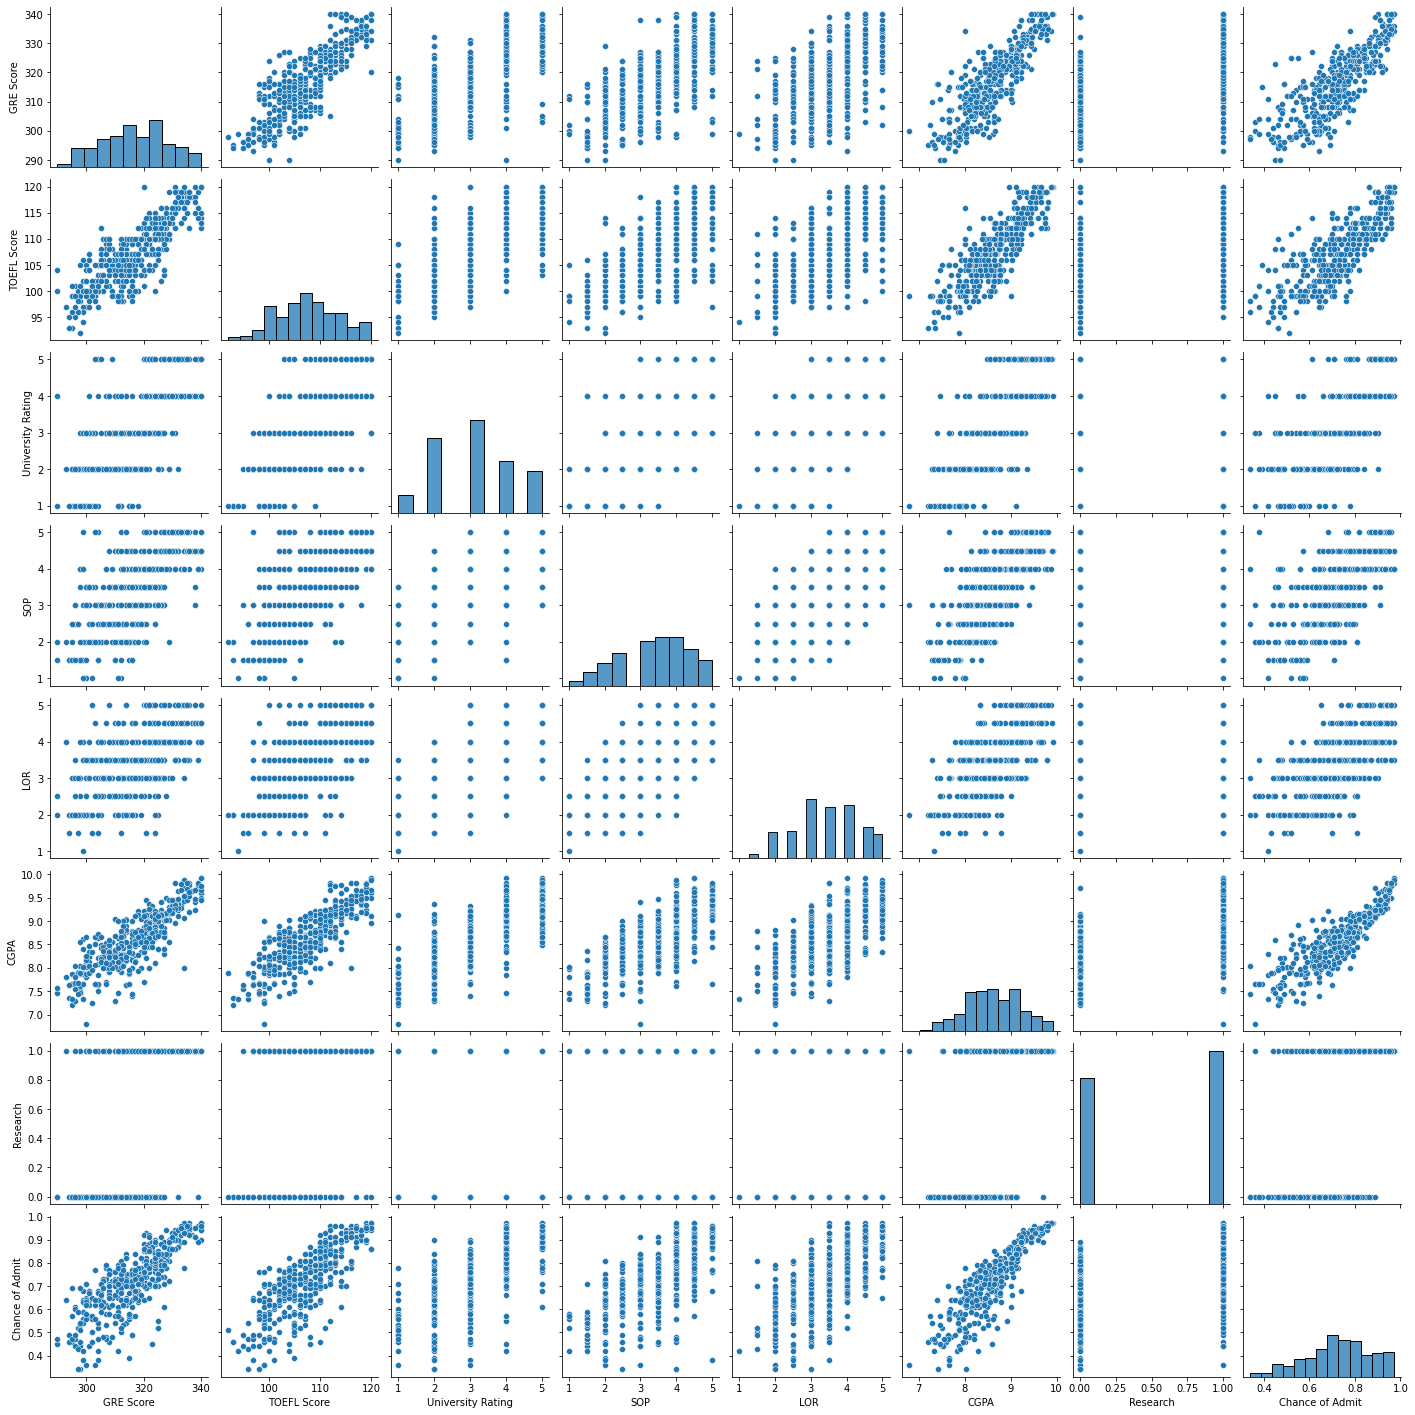

In [8]:
sns.pairplot(df)
plt.show()

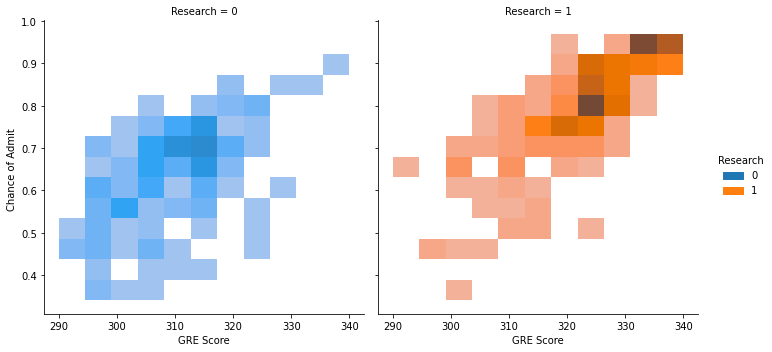

In [9]:
sns.displot(x="GRE Score",y="Chance of Admit ",data=df,hue="Research",col="Research")
plt.show()

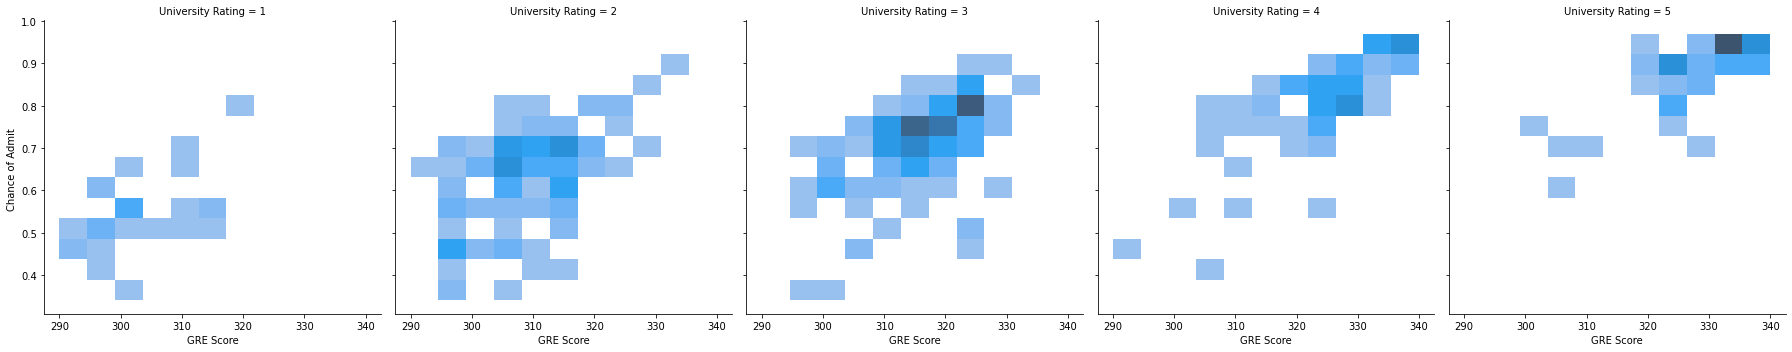

In [10]:
sns.displot(x="GRE Score",y="Chance of Admit ",data=df,col="University Rating")
plt.show()

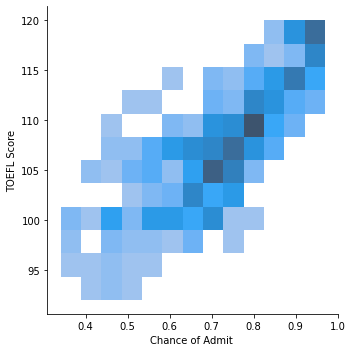

In [11]:
sns.displot(y="TOEFL Score",x="Chance of Admit ",data=df)
plt.show()

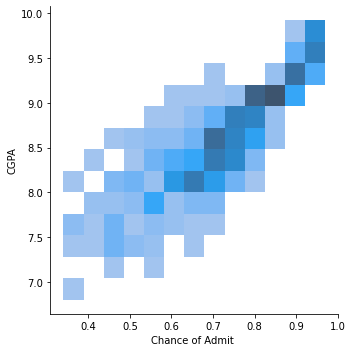

In [12]:
sns.displot(y="CGPA",x="Chance of Admit ",data=df)
plt.show()

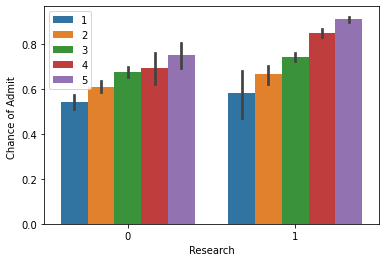

In [13]:
sns.barplot(x="Research",y="Chance of Admit ",data=df,hue="University Rating")
plt.legend(loc="upper left")
plt.show()

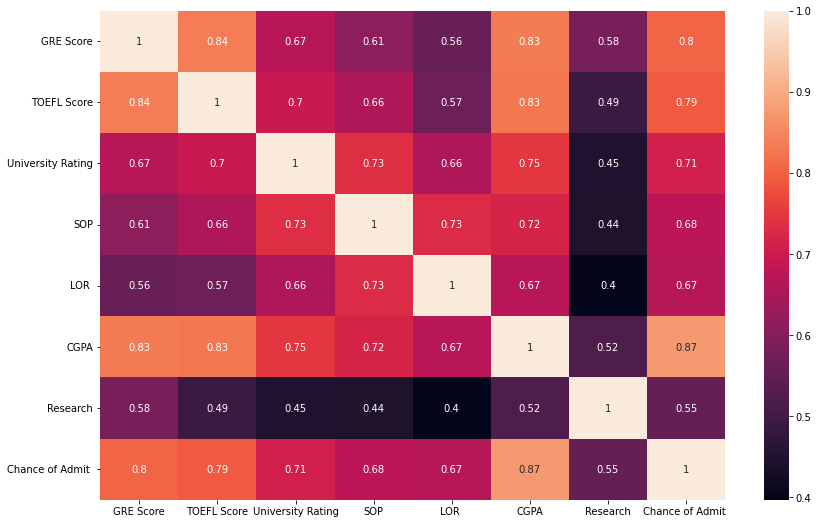

In [14]:
corr=df.corr()
plt.figure(figsize=[14,9])
sns.heatmap(corr,annot=True)
plt.show()

# TRAINING AND TESTING DATA

In [15]:
 
X=df.drop('Chance of Admit ', axis=1)
y=df["Chance of Admit "]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=30)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 7)
(320,)
(80, 7)
(80,)


In [19]:
X_train.mean()

GRE Score            316.618750
TOEFL Score          107.262500
University Rating      3.050000
SOP                    3.367188
LOR                    3.432812
CGPA                   8.591781
Research               0.528125
dtype: float64

In [20]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
313,301,100,3,3.5,3.0,8.04,0
21,325,114,4,3.0,2.0,8.40,0
222,324,113,4,4.5,4.0,8.79,0
350,318,107,3,3.0,3.5,8.27,1
398,312,103,3,3.5,4.0,8.78,0
...,...,...,...,...,...,...,...
309,308,110,4,3.5,3.0,8.60,0
386,302,101,2,2.5,3.5,7.96,0
140,329,110,2,4.0,3.0,9.15,1
301,319,108,2,2.5,3.0,8.76,0


# MODELS

# LINEAR REGRESSION

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
 y_pred = lr.predict(X_test)

In [25]:
y_test

35     0.88
316    0.54
281    0.80
74     0.74
296    0.76
       ... 
188    0.93
245    0.81
118    0.47
272    0.49
365    0.86
Name: Chance of Admit , Length: 80, dtype: float64

In [26]:
lr.score(X_test,y_test)*100

83.25349083642278

# CONCLUSION 

We got a accuracy of about 83 % using Linear Regression.

